___
# Ciencia dos Dados - Projeto 1




## Phelipe Müller
___

 # Televisão vs. Internet

___
Neste projeto vamos analisar quanto o espaço de mercadado da Televisão, principalmente o sinal por assinatura, está sendo consumido pela Internet.

Para isso vamos presumir que quanto melhor a qualidade do sinal de Internet mais o usuario consome e o mesmo é valido para a qualidade do sinal de TV.

Vamos começar analisando os dados da região Sudeste do Pais
___

In [270]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os

In [271]:
dados = pd.read_csv('DOM2015.csv')

In [272]:
dados1 = dados[((dados.UF<=35) & (dados.UF>= 31)) & ( (dados.V02272 > 0) | ((dados.V02273 == 1)| (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Sudeste & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)

In [273]:
dados2 = dados1[["UF","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2

In [274]:
#Vamos criar duas funções que nos mostra qual é o melhor sinal que um domicilio possui para TV e para Internet
def MelhorTV(df):
    if (df["V02272"] == 1.0): return 3
    elif(df["V02274"] == 1.0): return 2
    elif(df["V02273"] == 1.0): return 1
    else: return 0
    
def MelhorNET(df):
    if (df["V02425"] == 2): return 3
    elif(df["V02424"] == 2): return 2
    elif(df["V02426"] == 2): return 1
    else: return 0

In [275]:
TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET

In [276]:
dadosSD = dados2[["UF","V4622"]]
dadosSD["TV"] = dados3["TV"]
dadosSD["NET"] = dados3["NET"]

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [277]:
dadosSD.NET = dadosSD.NET.astype("category")
dadosSD.TV = dadosSD.TV.astype("category")

dadosSD.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])
dadosSD.TV.cat.categories=("Sem Sinal", "Aberta", "Antena", "Assinatura")

C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.25,0.71,0.03
Aberta,0.23,0.73,0.04
Antena,0.31,0.65,0.04
Assinatura,0.26,0.71,0.04


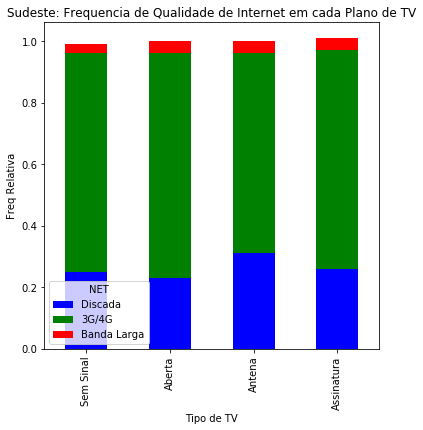

In [278]:
ut1SD = pd.crosstab(dadosSD.TV,dadosSD.NET,normalize="index").round(decimals=2)
plot = ut1SD.plot(kind='bar',title='Sudeste: Frequencia de Qualidade de Internet em cada Plano de TV',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1SD

TV,Sem Sinal,Aberta,Antena,Assinatura
NET,,,,
Discada,0.14,0.15,0.17,0.55
3G/4G,0.14,0.17,0.13,0.56
Banda Larga,0.12,0.17,0.16,0.54


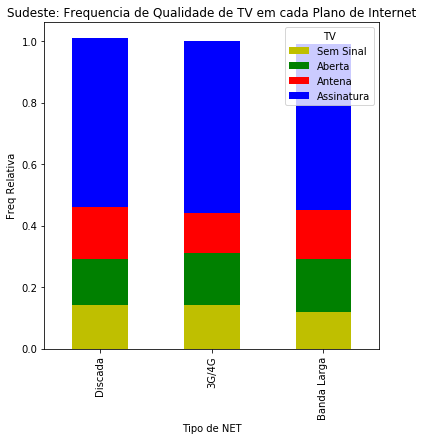

In [279]:
ut2SD = pd.crosstab(dadosSD.NET,dadosSD.TV,normalize="index").round(decimals=2)
plot = ut2SD.plot(kind='bar',title='Sudeste: Frequencia de Qualidade de TV em cada Plano de Internet',figsize=(6, 6),color=('y','g','r','b'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de NET')
ut2SD

___
Os primeiros graficos não nos indicam nenhuma relação direta ou indireta entre o consumo de TV e o consumo de Internet

Vamos analisar em duas faixas de renda para tentar validar nossas hipoteses sobre ter alguma relação cultural, usaremos as faixas: Menos que 3 Salarios Minimos per Capta e Mais que 3 Salarios Minimos per Capta
___

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.25,0.72,0.03
Aberta,0.22,0.74,0.04
Antena,0.30,0.66,0.04
Assinatura,0.26,0.69,0.04


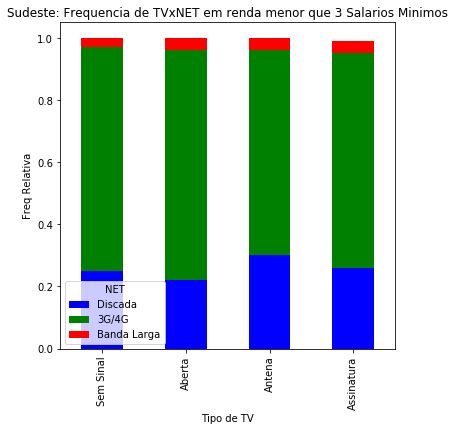

In [280]:
dados5pSD = dadosSD[(dadosSD.V4622 < 5)]
ut1pSD = pd.crosstab(dados5pSD.TV,dados5pSD.NET,normalize="index").round(decimals=2)
plot = ut1pSD.plot(kind='bar',title='Sudeste: Frequencia de TVxNET em renda menor que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1pSD

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.27,0.70,0.04
Aberta,0.27,0.70,0.04
Antena,0.35,0.59,0.06
Assinatura,0.25,0.73,0.03


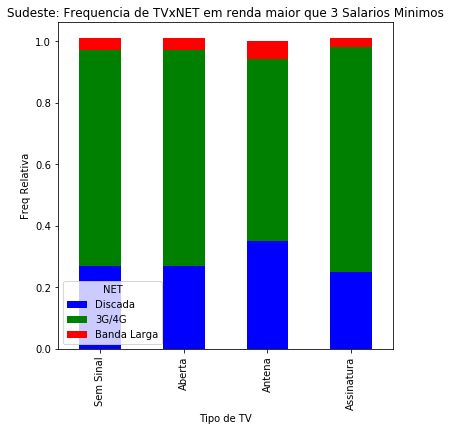

In [281]:
dados5rSD = dadosSD[(dadosSD.V4622 > 4)]
ut1rSD = pd.crosstab(dados5rSD.TV,dados5rSD.NET,normalize="index").round(decimals=2)
plot = ut1rSD.plot(kind='bar',title='Sudeste: Frequencia de TVxNET em renda maior que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1rSD

___
Após a analise das tabelas e graficos, mesmo dividindo a população do Sudeste em duas faixas de renda, não é indicado nenhuma relação entre o consumo de TV e Interte são encontrados

Para proseguir com nossa hipotese cultural, vamos aplicar a mesma analise nas demais regiões nacionais
___

### Realizando o mesmo processo de analise para as demais regiões nacionais, temos o seguinte:

## Sul

In [282]:
dados1 = dados[((dados.UF<=43) & (dados.UF>= 41)) & ( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Sul & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["UF","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dadosS = dados2[["UF","V4622"]]
dadosS["TV"] = dados3["TV"]
dadosS["NET"] = dados3["NET"]


dadosS.NET = dadosS.NET.astype("category")
dadosS.TV = dadosS.TV.astype("category")

dadosS.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])
dadosS.TV.cat.categories=("Sem Sinal", "Aberta", "Antena", "Assinatura")

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.32,0.65,0.03
Aberta,0.32,0.66,0.02
Antena,0.44,0.53,0.03
Assinatura,0.39,0.59,0.02


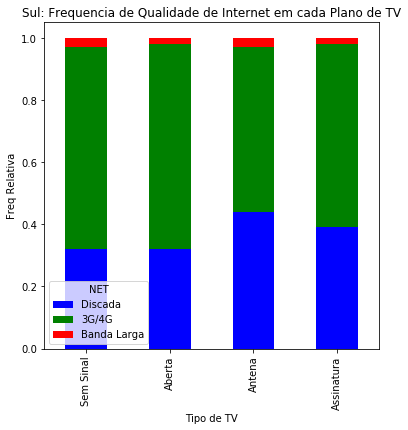

In [283]:
ut1S = pd.crosstab(dadosS.TV,dadosS.NET,normalize="index").round(decimals=2)
plot = ut1S.plot(kind='bar',title='Sul: Frequencia de Qualidade de Internet em cada Plano de TV',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1S

TV,Sem Sinal,Aberta,Antena,Assinatura
NET,,,,
Discada,0.13,0.15,0.22,0.50
3G/4G,0.16,0.19,0.16,0.48
Banda Larga,0.18,0.14,0.23,0.45


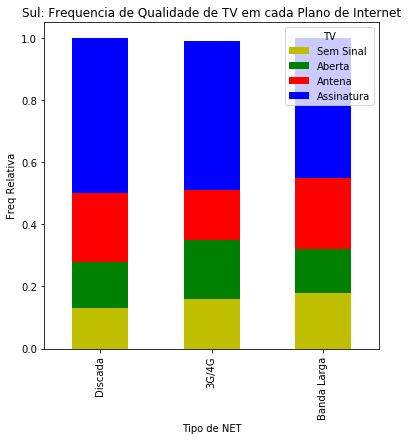

In [284]:
ut2S = pd.crosstab(dadosS.NET,dadosS.TV,normalize="index").round(decimals=2)
plot = ut2S.plot(kind='bar',title='Sul: Frequencia de Qualidade de TV em cada Plano de Internet',figsize=(6, 6),color=('y','g','r','b'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de NET')
ut2S

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.32,0.65,0.03
Aberta,0.31,0.67,0.02
Antena,0.43,0.54,0.03
Assinatura,0.40,0.58,0.02


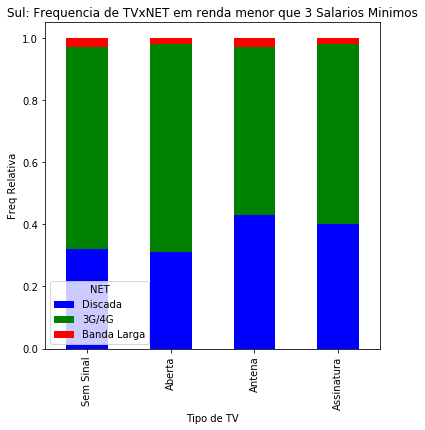

In [285]:
dados5pS = dadosS[(dadosS.V4622 < 5)]
ut1pS = pd.crosstab(dados5pS.TV,dados5pS.NET,normalize="index").round(decimals=2)
plot = ut1pS.plot(kind='bar',title='Sul: Frequencia de TVxNET em renda menor que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1pS

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.34,0.63,0.03
Aberta,0.35,0.63,0.02
Antena,0.47,0.48,0.05
Assinatura,0.37,0.60,0.02


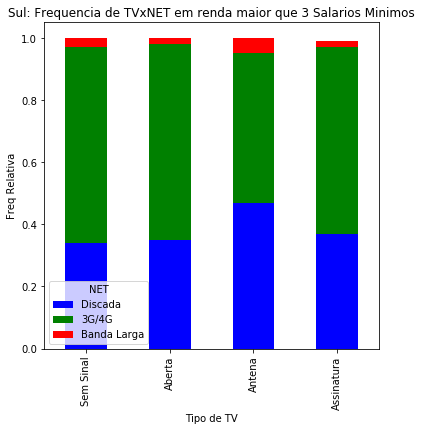

In [286]:
dados5rS = dadosS[(dadosS.V4622 > 4)]
ut1rS = pd.crosstab(dados5rS.TV,dados5rS.NET,normalize="index").round(decimals=2)
plot = ut1rS.plot(kind='bar',title='Sul: Frequencia de TVxNET em renda maior que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1rS

___
## Centro-Oeste

In [287]:
dados1 = dados[((dados.UF<=53) & (dados.UF>= 50)) & ( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Centro-Oeste & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["UF","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dadosCO = dados2[["UF","V4622"]]
dadosCO["TV"] = dados3["TV"]
dadosCO["NET"] = dados3["NET"]


dadosCO.NET = dadosCO.NET.astype("category")
dadosCO.TV = dadosCO.TV.astype("category")

dadosCO.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])
dadosCO.TV.cat.categories=("Sem Sinal", "Aberta", "Antena", "Assinatura")

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.20,0.77,0.03
Aberta,0.25,0.72,0.02
Antena,0.26,0.69,0.04
Assinatura,0.27,0.70,0.03


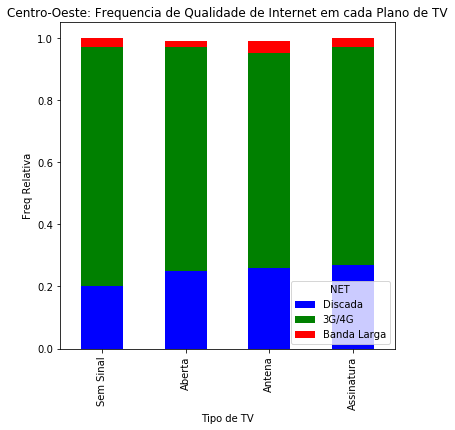

In [288]:
ut1CO = pd.crosstab(dadosCO.TV,dadosCO.NET,normalize="index").round(decimals=2)
plot = ut1CO.plot(kind='bar',title='Centro-Oeste: Frequencia de Qualidade de Internet em cada Plano de TV',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1CO

TV,Sem Sinal,Aberta,Antena,Assinatura
NET,,,,
Discada,0.13,0.15,0.25,0.47
3G/4G,0.18,0.15,0.23,0.44
Banda Larga,0.14,0.10,0.32,0.43


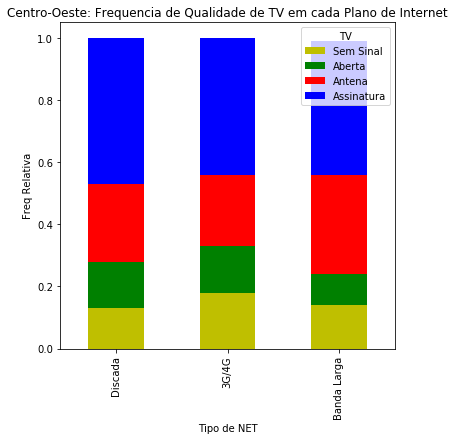

In [289]:
ut2CO = pd.crosstab(dadosCO.NET,dadosCO.TV,normalize="index").round(decimals=2)
plot = ut2CO.plot(kind='bar',title='Centro-Oeste: Frequencia de Qualidade de TV em cada Plano de Internet',figsize=(6, 6),color=('y','g','r','b'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de NET')
ut2CO

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.20,0.77,0.03
Aberta,0.26,0.71,0.02
Antena,0.25,0.71,0.04
Assinatura,0.29,0.68,0.03


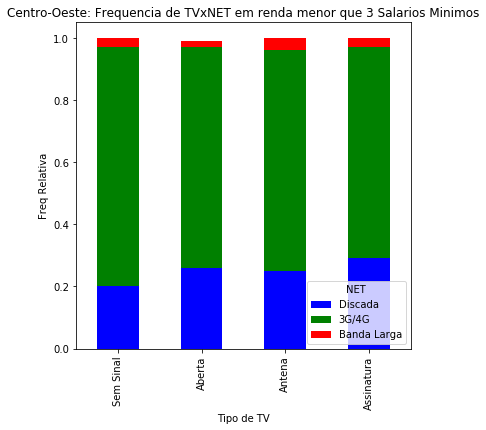

In [290]:
dados5pCO = dadosCO[(dadosCO.V4622 < 5)]
ut1pCO = pd.crosstab(dados5pCO.TV,dados5pCO.NET,normalize="index").round(decimals=2)
plot = ut1pCO.plot(kind='bar',title='Centro-Oeste: Frequencia de TVxNET em renda menor que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1pCO

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.20,0.77,0.02
Aberta,0.23,0.76,0.02
Antena,0.31,0.63,0.06
Assinatura,0.25,0.72,0.03


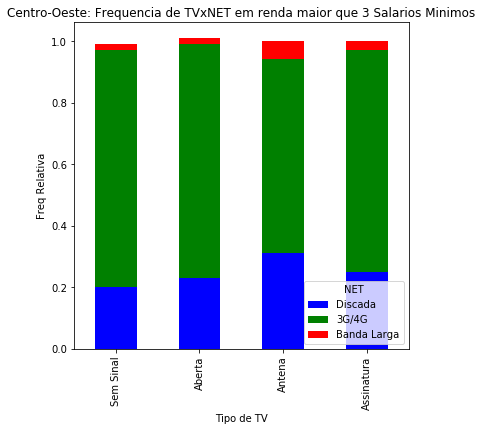

In [291]:
dados5rCO = dadosCO[(dadosCO.V4622 > 4)]
ut1rCO = pd.crosstab(dados5rCO.TV,dados5rCO.NET,normalize="index").round(decimals=2)
plot = ut1rCO.plot(kind='bar',title='Centro-Oeste: Frequencia de TVxNET em renda maior que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1rCO

___
## Nordeste

In [292]:
dados1 = dados[((dados.UF<=29) & (dados.UF>= 21)) & ( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Nordeste & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["UF","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dadosND = dados2[["UF","V4622"]]
dadosND["TV"] = dados3["TV"]
dadosND["NET"] = dados3["NET"]


dadosND.NET = dadosND.NET.astype("category")
dadosND.TV = dadosND.TV.astype("category")

dadosND.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])
dadosND.TV.cat.categories=("Sem Sinal", "Aberta", "Antena", "Assinatura")

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.26,0.73,0.01
Aberta,0.30,0.69,0.02
Antena,0.34,0.62,0.04
Assinatura,0.32,0.65,0.03


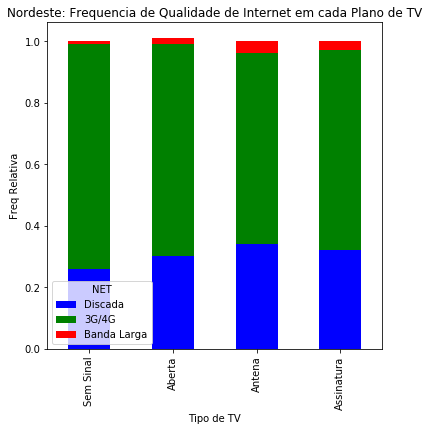

In [293]:
ut1ND = pd.crosstab(dadosND.TV,dadosND.NET,normalize="index").round(decimals=2)
plot = ut1ND.plot(kind='bar',title='Nordeste: Frequencia de Qualidade de Internet em cada Plano de TV',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1ND

TV,Sem Sinal,Aberta,Antena,Assinatura
NET,,,,
Discada,0.16,0.22,0.29,0.33
3G/4G,0.21,0.24,0.25,0.31
Banda Larga,0.10,0.14,0.45,0.31


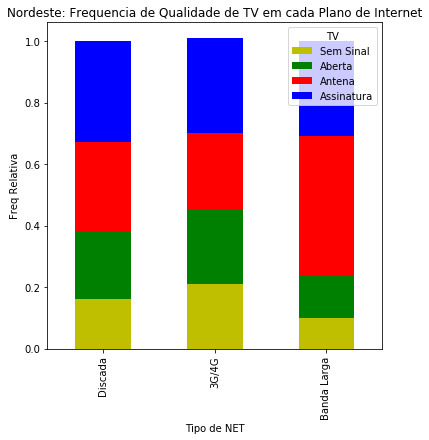

In [294]:
ut2ND = pd.crosstab(dadosND.NET,dadosND.TV,normalize="index").round(decimals=2)
plot = ut2ND.plot(kind='bar',title='Nordeste: Frequencia de Qualidade de TV em cada Plano de Internet',figsize=(6, 6),color=('y','g','r','b'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de NET')
ut2ND

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.26,0.73,0.01
Aberta,0.29,0.69,0.02
Antena,0.34,0.62,0.04
Assinatura,0.34,0.63,0.03


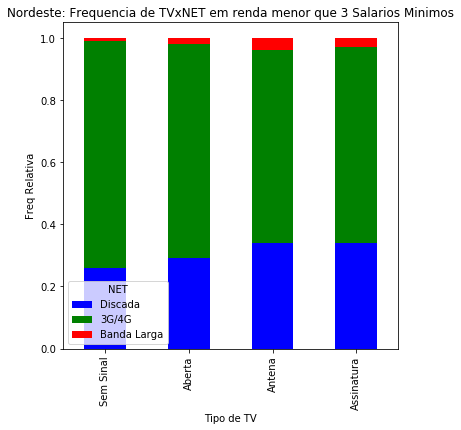

In [295]:
dados5pND = dadosND[(dadosND.V4622 < 5)]
ut1pND = pd.crosstab(dados5pND.TV,dados5pND.NET,normalize="index").round(decimals=2)
plot = ut1pND.plot(kind='bar',title='Nordeste: Frequencia de TVxNET em renda menor que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1pND

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.26,0.72,0.02
Aberta,0.32,0.66,0.02
Antena,0.39,0.55,0.06
Assinatura,0.30,0.68,0.02


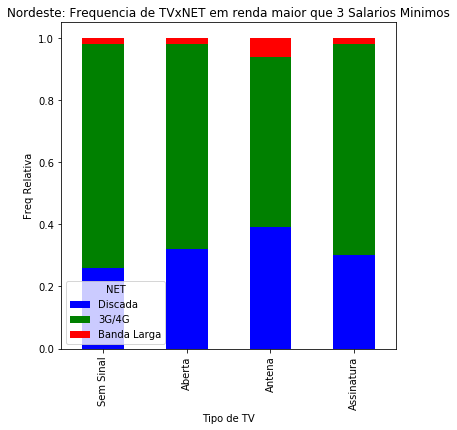

In [296]:
dados5rND = dadosND[(dadosND.V4622 > 4)]
ut1rND = pd.crosstab(dados5rND.TV,dados5rND.NET,normalize="index").round(decimals=2)
plot = ut1rND.plot(kind='bar',title='Nordeste: Frequencia de TVxNET em renda maior que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1rND

___
## Norte

In [297]:
dados1 = dados[((dados.UF<=17) & (dados.UF>= 11)) & ( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados (Região Norte & Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["UF","V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dadosN = dados2[["UF","V4622"]]
dadosN["TV"] = dados3["TV"]
dadosN["NET"] = dados3["NET"]


dadosN.NET = dados4.NET.astype("category")
dadosN.TV = dados4.TV.astype("category")

dadosN.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])
dadosN.TV.cat.categories=("Sem Sinal", "Aberta", "Antena", "Assinatura")

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.09,0.89,0.02
Aberta,0.13,0.85,0.02
Antena,0.20,0.75,0.05
Assinatura,0.23,0.73,0.04


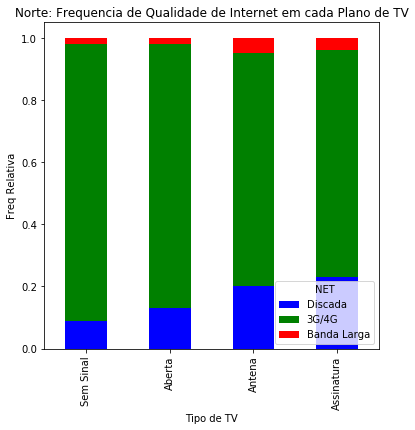

In [298]:
ut1N = pd.crosstab(dadosN.TV,dadosN.NET,normalize="index").round(decimals=2)
plot = ut1N.plot(kind='bar',title='Norte: Frequencia de Qualidade de Internet em cada Plano de TV',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1N

TV,Sem Sinal,Aberta,Antena,Assinatura
NET,,,,
Discada,0.12,0.16,0.27,0.45
3G/4G,0.26,0.23,0.21,0.31
Banda Larga,0.15,0.13,0.32,0.40


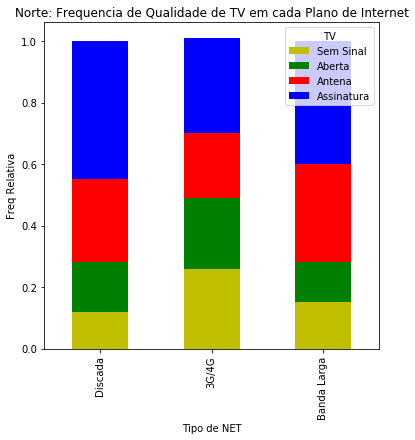

In [299]:
ut2N = pd.crosstab(dadosN.NET,dadosN.TV,normalize="index").round(decimals=2)
plot = ut2N.plot(kind='bar',title='Norte: Frequencia de Qualidade de TV em cada Plano de Internet',figsize=(6, 6),color=('y','g','r','b'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de NET')
ut2N

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.08,0.90,0.02
Aberta,0.11,0.87,0.02
Antena,0.19,0.76,0.04
Assinatura,0.21,0.76,0.03


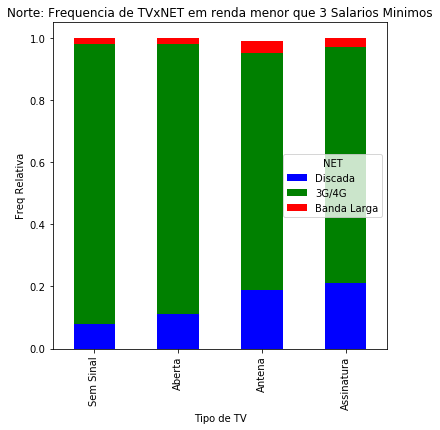

In [300]:
dados5pN = dadosN[(dadosN.V4622 < 5)]
ut1pN = pd.crosstab(dados5pN.TV,dados5pN.NET,normalize="index").round(decimals=2)
plot = ut1pN.plot(kind='bar',title='Norte: Frequencia de TVxNET em renda menor que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1pN

NET,Discada,3G/4G,Banda Larga
TV,,,
Sem Sinal,0.17,0.74,0.09
Aberta,0.19,0.77,0.03
Antena,0.25,0.67,0.08
Assinatura,0.26,0.69,0.05


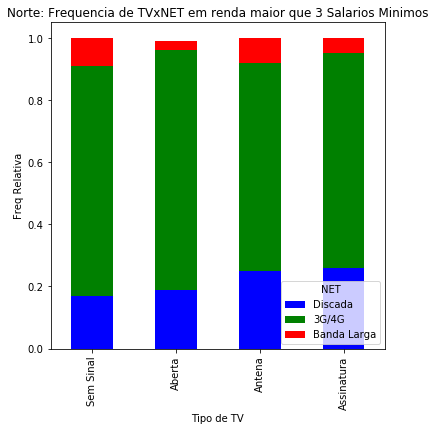

In [301]:
dados5rN = dadosN[(dadosN.V4622 > 4)]
ut1rN = pd.crosstab(dados5rN.TV,dados5rN.NET,normalize="index").round(decimals=2)
plot = ut1rN.plot(kind='bar',title='Norte: Frequencia de TVxNET em renda maior que 3 Salarios Minimos',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Tipo de TV')
ut1rN

___
A analise individual de cada uma das outras 4 regiões não nos revelam nada muito diferente, vamos agora fazer uma analise comparativa entre as regiões

Como alvo de nosso estudo, vamos focar os domicilios com acesso a TV por Assinatura
___

In [302]:
def dadosReg(df):
    if((df["UF"] > 10) & (df["UF"] < 20)): return "Norte"
    elif(df["UF"] < 30): return "Nordeste"
    elif(df["UF"] < 40): return "Sudeste"
    elif(df["UF"] < 50): return "Sul"
    else: return "Centro"

In [303]:
Regiao = dados.apply(dadosReg,axis=1)
TV = dados.apply(MelhorTV,axis=1)
NET = dados.apply(MelhorNET,axis=1)
dados["Regiao"] = Regiao
dados["TV"] = TV
dados["NET"] = NET
dadosCom = dados[["Regiao","TV","NET"]]
dadosCom = dadosCom[(dadosCom.TV == 3)]

In [304]:
dadosCom.NET = dadosCom.NET.astype("category")
dadosCom.NET.cat.categories=(["Sem Acesso","Discada","3G/4G","Banda Larga"])

NET,Sem Acesso,Discada,3G/4G,Banda Larga
Regiao,,,,
Centro,0.13,0.23,0.61,0.03
Nordeste,0.16,0.27,0.55,0.02
Norte,0.20,0.18,0.59,0.03
Sudeste,0.15,0.22,0.60,0.03
Sul,0.13,0.33,0.51,0.02


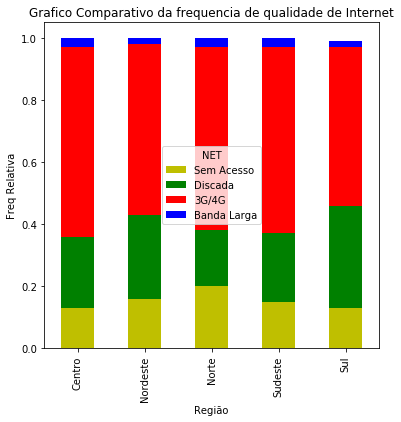

In [305]:
utCom = pd.crosstab(dadosCom.Regiao,dadosCom.NET,normalize="index").round(decimals=2)
plot = utCom.plot(kind='bar',title='Grafico Comparativo da frequencia de qualidade de Internet',figsize=(6, 6),color=('y','g','r',"b"),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Região')
utCom

___
A analise comparativa continua indicando não existir nenhuma relação entre o consumo de TV e Internet

Mas nos mostra que a maioria dos Brasileiros acessam a internet principalmente por 3G e 4G, assim como podemos ver mais claramente no grafico abaixo
___

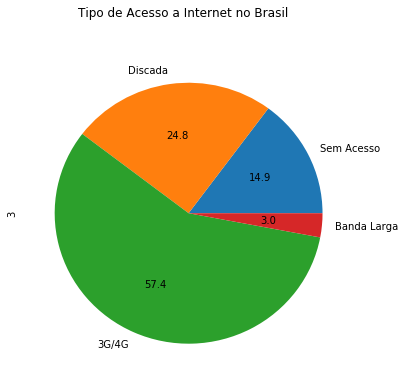

In [338]:
utPie = pd.crosstab(dadosCom.TV,dadosCom.NET,normalize="index").round(decimals=2).T
plot = utPie.plot(kind='pie',subplots=True, title='Tipo de Acesso a Internet no Brasil',autopct='%.1f',figsize=(6, 6),legend=False)

___
E por fim, na esperança de encontrar algo interessante, vamos fazer uma analise ao longo de 3 anos, usando de amostra os domicilios com TV por assinatura em todo o pais
___

In [360]:
dados = pd.read_csv('DOM2014.csv')
dados1 = dados[( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados ( Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dados2014 = dados2[["V4622"]]
dados2014["TV"] = dados3["TV"]
dados2014["NET"] = dados3["NET"]

#dados2014.TV = dados2014[(dados2014.TV == 3)]

dados2014.NET = dados2014.NET.astype("category")

dados2014.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])

ut = pd.crosstab(dados2014.TV,dados2014.NET,normalize="index").round(decimals=2).T
ut

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

TV,0,1,2,3
NET,,,,
Discada,0.27,0.30,0.38,0.35
3G/4G,0.70,0.68,0.58,0.63
Banda Larga,0.03,0.02,0.04,0.03


In [378]:
dados = pd.read_csv('DOM2013.csv')
dados1 = dados[( (dados.V02272 > 0) | ((dados.V02273 == 1) | (dados.V02273 == 3)) | (dados.V02274 > 0)) & (((dados.V02424==1)|(dados.V02274 == 3)) | (dados.V02425 > 0) | (dados.V02426 > 0))]
#dados ( Que possua qualquer tipo de sinal de TV & Que possual qualquer tipo de sinal de Internet)


dados2 = dados1[["V02272","V02273","V02274","V02424","V02425","V02426","V4622"]]
dados2 = dados2.dropna(how='any')
dados3 = dados2


TV = dados3.apply(MelhorTV,axis=1)
NET = dados3.apply(MelhorNET,axis=1)

dados3["TV"] = TV
dados3["NET"] = NET


dados2014 = dados2[["V4622"]]
dados2014["TV"] = dados3["TV"]
dados2014["NET"] = dados3["NET"]

#dados2014.TV = dados2014[(dados2014.TV == 3)]

dados2014.NET = dados2014.NET.astype("category")

dados2014.NET.cat.categories=(["Discada","3G/4G","Banda Larga"])

ut = pd.crosstab(dados2014.TV,dados2014.NET,normalize="index").round(decimals=2).T
ut

C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\pheli\Anaconda3\lib\site-packages\pandas\core\generic.py:2773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#ind

TV,0,1,2,3
NET,,,,
Discada,0.46,0.50,0.56,0.51
3G/4G,0.50,0.47,0.38,0.44
Banda Larga,0.05,0.04,0.06,0.04


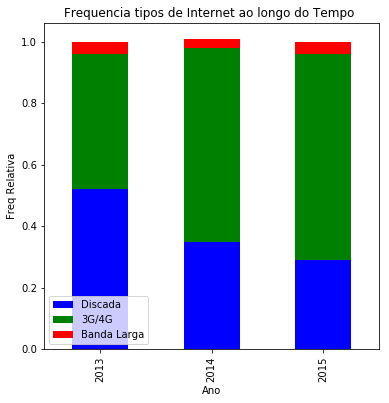

In [376]:
#Dados de Frequencia Relativa transpostos a mão, devido a dificuldade de trabalhar com Dataframes com tamanhos diferentes
#Asseguro que os dados não foram comprometidos no processo
utTempo = pd.DataFrame({2013: [0.52,0.44,0.04],
                        2014: [0.35,0.63,0.03],
                        2015: [0.29,0.67,0.04]},
                        index=("Discada","3G/4G","Banda Larga")
                        ).T
plot = utTempo.plot(kind='bar',title='Frequencia tipos de Internet ao longo do Tempo ',figsize=(6, 6),color=('b','g','r'),stacked=True)
plt.ylabel('Freq Relativa')
plt.xlabel('Ano')

___
Com a analise temporal é bem visivel o movimento de migração de Internet Discada para 3G/4G
___

## Conclusão

Podemos concluir que por mais que não haja um movimento claro de migração de TV para Internet em nenhum contexto geografioco, economico ou social é visivel a migração entre Internet Discada para 3G/4G em todo o pais